<a href="https://colab.research.google.com/github/mleyvaz/AV/blob/master/desercion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     |████████████████████████████████| 266kB 7.6MB/s 
     |████████████████████████████████| 215kB 12.1MB/s 
     |████████████████████████████████| 1.7MB 15.0MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 1.8MB 21.0MB/s 
     |████████████████████████████████| 245kB 45.0MB/s 
     |████████████████████████████████| 14.2MB 338kB/s 
     |████████████████████████████████| 276kB 23.7MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 6.8MB 39.6MB/s 
     |████████████████████████████████| 604kB 45.7MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 3.1MB 50.0MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 1.1MB 43.2MB/s 
     |████████████████████████████████| 163kB 47.1MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 153kB 48.3MB/s 

In [18]:
pip install shap

     |████████████████████████████████| 358kB 8.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491630 sha256=fc3f1a8c6dfd7e0c6833456d0532c7efe4ea2ff156c8762bfc1dbd16ada89515
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [6]:
from pycaret.utils import enable_colab
enable_colab()
import pandas as pd
import seaborn as sns

Colab mode enabled.


In [28]:
url = "https://github.com/mleyvaz/escolar/blob/main/datosunificados.xlsx?raw=true"
dataset = pd.read_excel(url)
dataset.head(10)

,"¿Por cuál de las siguientes razones, eligió la carrera de Desarrollo de Software?",El Colegio en el que se graduó es de tipo:,¿Qué le parece la nivelación de la carrera?,¿Cómo calificaría las clases recibidas por sus docentes?,¿Se siente preparado para empezar la carrera?,Score,¿Que es un Algoritmo?,¿Que es lógica de la Programación?,¿Que busca un Algoritmo?,¿Cuáles son los procesos que se cumplen para programar?.,¿Con que herramienta de modelado se representa un algoritmo?,Una aplicación es:,Un algoritmo se compone de:,Un GIGABYTES a cuántos MEGABYTES corresponde,convierta el siguiente numero decimal a binario 8,¿Qué es un base de datos?,"¿Tiene usted algún tipo de capacitación, ya sea formal o informal, sobre desarrollo de software computacional?",¿Cuál es la especialización de su bachillerato?,Timestamp (1),Email Address,Nombres y Apellidos: (1),¿De qué especialidad se gradúo?,Escriba el nombre de la carrera que le hubiese gustado seguir,Timestamp (2),desercion
0,Me agrada la carrera,Particular,Una oportunidad de equiparar conocimientos,8,Tal vez,3 / 10,Es la técnica utilizada para desarrollar instr...,Es la técnica utilizada para desarrollar instr...,Busca escribir la codificación de un programa ...,"Analizar, Resolver , codificar y Probar.",Diagrama de flujo.,Un pseudocódigo,Entornos,1 MB,10,Es un algoritmo de programación,SI,Informatica,6/22/2020 20:19:44,jpvargas@est.itsgg.edu.ec,vargas ramos jhordan patricio,informatica,electronica,6/9/2020 20:05:57,1
1,Me agrada la carrera,Particular,Una oportunidad de equiparar conocimientos,10,Sí,6 / 10,Secuencia de instrucciones finitas que llevan ...,Es la técnica utilizada para desarrollar instr...,Ninguna de las anteriores.,"Analizar, Resolver , codificar y Probar.",Diagrama de flujo.,"Un grupo de funciones, tareas o actividades pa...",Procesadores,1000 MB,1001,Es un repositorio de almacenamiento,SI,Otra,6/22/2020 20:20:04,enalvarado@est.itsgg.edu.ec,Emely Nicole Alvarado Tigrero,Ciencias,Me gusta la carrera que se tratan de computadoras,6/9/2020 19:59:08,0
2,Me agrada la carrera,Fiscal,Una oportunidad de equiparar conocimientos,10,Sí,4 / 10,Secuencia de instrucciones finitas que llevan ...,"Ciencia que estudia la estructura, fundamentos...",Dar una solución a uno o más problemas.,"Resolver, codificar, probar, analizar.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o actividades pa...",Ensambladores,1 MB,1001,Es un repositorio de almacenamiento,NO,Otra,6/22/2020 20:20:05,aafigueroa@est.itsgg.edu.ec,allison figueoa,servicios hoteleros,gastronomia,6/9/2020 21:30:29,0
3,Me agrada la carrera,Fiscal,Una oportunidad de equiparar conocimientos,10,Tal vez,4 / 10,Secuencia de instrucciones finitas que llevan ...,Es la técnica utilizada para desarrollar instr...,Dar una solución a uno o más problemas.,"Resolver, codificar, probar, analizar.",Código en un lenguaje de programación.,Un pseudocódigo,Entornos,1000 MB,1,Es un repositorio de almacenamiento,NO,Contabilidad,6/22/2020 20:20:05,cdgalarza@est.itsgg.edu.ec,Cristhian David Galarza Vargas,Contabilidad,Administración De Empresa,6/9/2020 20:00:27,0
4,Me agrada la carrera,Fiscal,Una oportunidad de equiparar conocimientos,10,Sí,3 / 10,Es la técnica utilizada para desarrollar instr...,Pasos a seguir,Dar una solución a uno o más problemas.,"Analizar, Resolver , codificar y Probar.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o actividades pa...",Procesadores,1000 MB,10,Es un algoritmo de programación,NO,Informatica,6/22/2020 20:20:18,glcalderon@est.itsgg.edu.ec,Genesis lisbeth calderon bravo,Informática,Ingenieria es sistema,6/9/2020 19:59:03,0
5,Me agrada la carrera,Fiscal,Una oportunidad de equiparar conocimientos,10,Sí,6 / 10,Es la técnica utilizada para desarrollar instr...,Es la técnica utilizada para desarrollar instr...,Busca escribir la codificación de un programa ...,"Analizar, Resolver , codificar y Probar.",Código en un lenguaje de programación.,"Un grupo de funciones, tareas o a

,¿Cómo calificaría las clases recibidas por sus docentes?,convierta el siguiente numero decimal a binario 8,desercion
¿Cómo calificaría las clases recibidas por sus docentes?,1.000000,0.061826,-0.097558
convierta el siguiente numero decimal a binario 8,0.061826,1.000000,-0.112055
desercion,-0.097558,-0.112055,1.000000


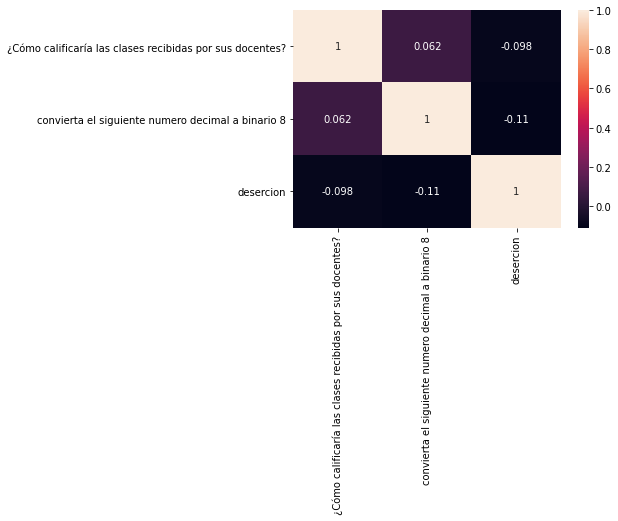

In [7]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix

In [9]:
# Importing dataset
from pycaret.datasets import get_data


# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = dataset, target = 'desercion', fix_imbalance = True)

,Description,Value
0,session_id,4949
1,Target,desercion
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(219, 25)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8438,0.4893,0.0500,0.1000,0.0667,0.0634,0.0681,0.492
qda,Quadratic Discriminant Analysis,0.8371,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.057
et,Extra Trees Classifier,0.8371,0.4551,0.0000,0.0000,0.0000,0.0000,0.0000,0.488
gbc,Gradient Boosting Classifier,0.8108,0.4216,0.0833,0.2000,0.1167,0.0543,0.0645,0.188
lightgbm,Light Gradient Boosting Machine,0.7846,0.4626,0.0500,0.1000,0.0667,-0.0095,-0.0089,0.074
ada,Ada Boost Classifier,0.7712,0.3769,0.0667,0.0667,0.0667,-0.0296,-0.0304,0.148
dt,Decision Tree Classifier,0.7242,0.4667,0.0833,0.1500,0.1067,-0.0357,-0.0371,0.044
svm,SVM - Linear Kernel,0.6842,0.0000,0.2667,0.2283,0.2115,0.0359,0.0458,0.043
lr,Logistic Regression,0.6779,0.4359,0.2000,0.1617,0.1621,-0.0201,-0.0170,0.315
ridge,Ridge Classifier,0.6775,0.0000,0.2500,0.2192,0.1938,0.0181,0.0298,0.046


In [13]:
rf = create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.3974,0.00,0.0,0.0000,0.0000,0.0000
1,0.8125,0.6282,0.00,0.0,0.0000,0.0000,0.0000
2,0.8125,0.7821,0.00,0.0,0.0000,0.0000,0.0000
3,0.8667,0.6538,0.00,0.0,0.0000,0.0000,0.0000
4,0.8667,0.4615,0.00,0.0,0.0000,0.0000,0.0000
5,0.9333,0.5769,0.50,1.0,0.6667,0.6341,0.6814
6,0.8667,0.2692,0.00,0.0,0.0000,0.0000,0.0000
7,0.8667,0.3462,0.00,0.0,0.0000,0.0000,0.0000
8,0.8000,0.3472,0.00,0.0,0.0000,0.0000,0.0000
9,0.8000,0.4306,0.00,0.0,0.0000,0.0000,0.0000


In [14]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.5,0.0,0.0,0.0,0.0,0.0
1,0.8125,0.5,0.0,0.0,0.0,0.0,0.0
2,0.8125,0.5,0.0,0.0,0.0,0.0,0.0
3,0.8667,0.5,0.0,0.0,0.0,0.0,0.0
4,0.8667,0.5,0.0,0.0,0.0,0.0,0.0
5,0.8667,0.5,0.0,0.0,0.0,0.0,0.0
6,0.8667,0.5,0.0,0.0,0.0,0.0,0.0
7,0.8667,0.5,0.0,0.0,0.0,0.0,0.0
8,0.8000,0.5,0.0,0.0,0.0,0.0,0.0
9,0.8000,0.5,0.0,0.0,0.0,0.0,0.0


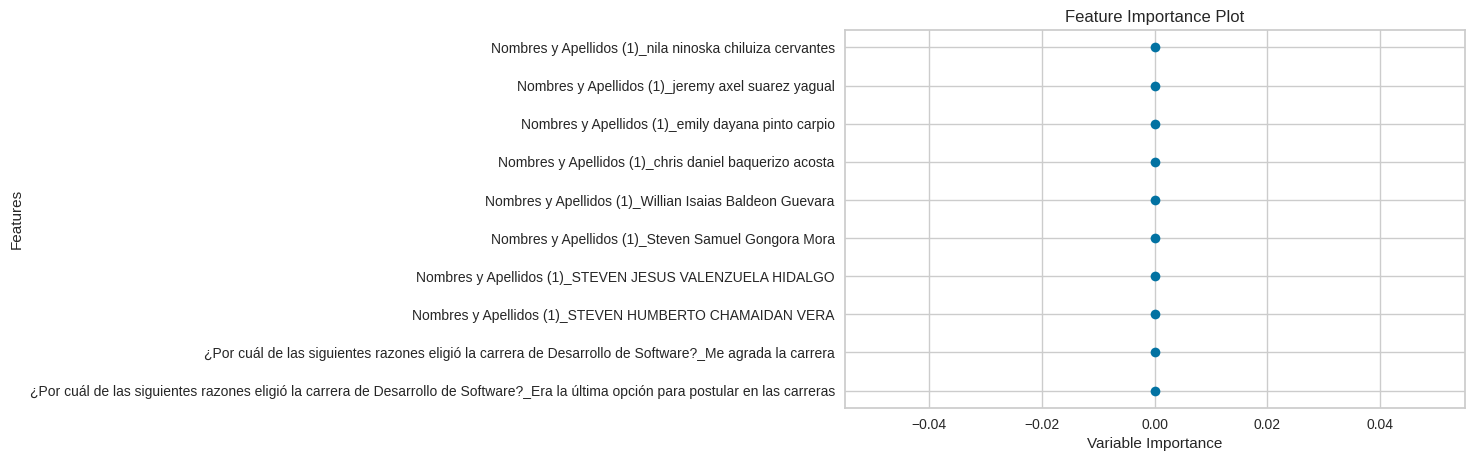

In [25]:
plot_model(tuned_rf, plot='feature')

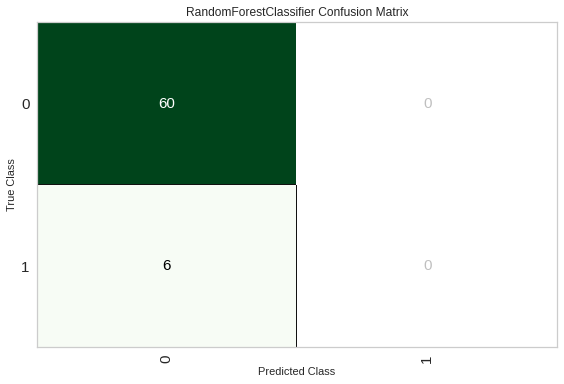

In [27]:
plot_model(tuned_rf, plot='confusion_matrix')

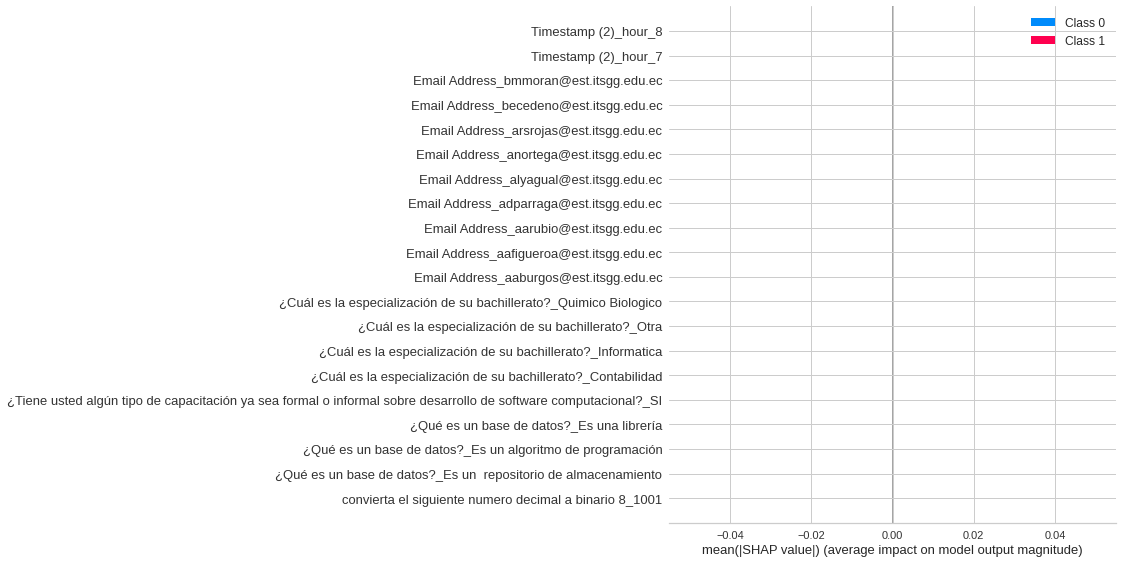

In [19]:
interpret_model(tuned_rf)

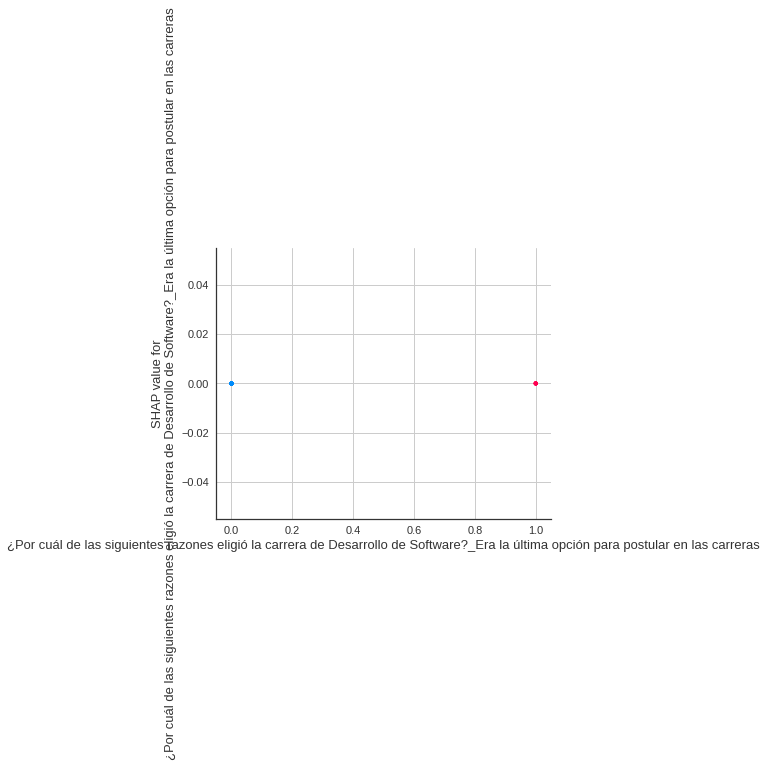

In [22]:
interpret_model(tuned_rf, plot = 'correlation')

In [23]:
interpret_model(tuned_rf, plot = 'reason', observation = 10)